## 1) Standard Imports

In [21]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

import torch

## 2) Read in Data

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 3) Data Cleaning

First organize and seperate data features by numerical and categorical:

In [17]:
def numerical_categorical(dataframe):
    numerical, categorical = [], []
    for col in dataframe.columns:
        if dataframe[col].dtype == 'O':
            categorical.append(col)
        else:
            numerical.append(col)
    return (numerical, categorical)

In [20]:
numerical, categorical = numerical_categorical(data)
print(numerical)
print('-' * 80)
print(categorical)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
--------------------------------------------------------------------------------
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'

So lets now take a closer look at our different types of data

### Inspection of Numerical Data

For the numerical data, a high level overview with a correlation matrix is a good start:

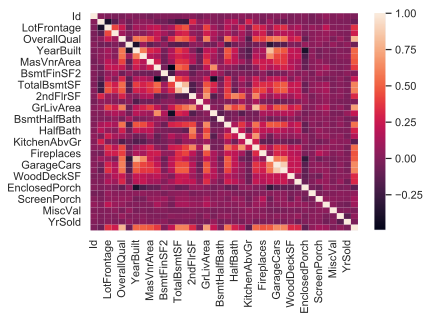

In [28]:
corr_matrix = data[numerical].corr()

# Plot Heatmap
sns.heatmap(corr_matrix);

## 4. Preliminary Linear Regression

For this experiment, we will only work with the numerical data to start.

Let's seperate our target (saleprice) from our features (everything else)

In [31]:
train_x = data[numerical].drop(columns=['SalePrice'])
train_y = data['SalePrice']

Now creating pytorch tensors based on our training data:

In [48]:
torch_x = torch.tensor(train_x.values).float()
torch_y = torch.tensor(train_y.values).float()

In [69]:
data[numerical].head(1)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   

   SalePrice  
0     208500  

[1 rows x 38 columns]

In [62]:
torch_x[0]

tensor([1.0000e+00, 6.0000e+01, 6.5000e+01, 8.4500e+03, 7.0000e+00, 5.0000e+00,
        2.0030e+03, 2.0030e+03, 1.9600e+02, 7.0600e+02, 0.0000e+00, 1.5000e+02,
        8.5600e+02, 8.5600e+02, 8.5400e+02, 0.0000e+00, 1.7100e+03, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 8.0000e+00,
        0.0000e+00, 2.0030e+03, 2.0000e+00, 5.4800e+02, 0.0000e+00, 6.1000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0080e+03])

In [49]:
torch_x.shape

torch.Size([1460, 37])

Now creating our Linear Regression class

In [50]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(37, 1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

Instantiate a model:

In [51]:
test_model = LinearRegressionModel()

Defining our Loss Function and Optimizer

In [60]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(test_model.parameters(), lr=0.01)

And now for some training:

In [70]:
for epoch in range(500):
    # Forward Pass
    pred_y = test_model(torch_x)
    
    # Compute Loss
    loss = criterion(pred_y, torch_y)
    
    # Zero gradients, backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss nan
epoch 1, loss nan
epoch 2, loss nan
epoch 3, loss nan
epoch 4, loss nan
epoch 5, loss nan
epoch 6, loss nan
epoch 7, loss nan
epoch 8, loss nan
epoch 9, loss nan
epoch 10, loss nan
epoch 11, loss nan
epoch 12, loss nan
epoch 13, loss nan
epoch 14, loss nan
epoch 15, loss nan
epoch 16, loss nan
epoch 17, loss nan
epoch 18, loss nan
epoch 19, loss nan
epoch 20, loss nan
epoch 21, loss nan
epoch 22, loss nan
epoch 23, loss nan
epoch 24, loss nan
epoch 25, loss nan
epoch 26, loss nan
epoch 27, loss nan
epoch 28, loss nan
epoch 29, loss nan
epoch 30, loss nan
epoch 31, loss nan
epoch 32, loss nan
epoch 33, loss nan
epoch 34, loss nan
epoch 35, loss nan
epoch 36, loss nan
epoch 37, loss nan
epoch 38, loss nan
epoch 39, loss nan
epoch 40, loss nan
epoch 41, loss nan
epoch 42, loss nan
epoch 43, loss nan
epoch 44, loss nan
epoch 45, loss nan
epoch 46, loss nan
epoch 47, loss nan
epoch 48, loss nan
epoch 49, loss nan
epoch 50, loss nan
epoch 51, loss nan
epoch 52, loss nan
epo

epoch 435, loss nan
epoch 436, loss nan
epoch 437, loss nan
epoch 438, loss nan
epoch 439, loss nan
epoch 440, loss nan
epoch 441, loss nan
epoch 442, loss nan
epoch 443, loss nan
epoch 444, loss nan
epoch 445, loss nan
epoch 446, loss nan
epoch 447, loss nan
epoch 448, loss nan
epoch 449, loss nan
epoch 450, loss nan
epoch 451, loss nan
epoch 452, loss nan
epoch 453, loss nan
epoch 454, loss nan
epoch 455, loss nan
epoch 456, loss nan
epoch 457, loss nan
epoch 458, loss nan
epoch 459, loss nan
epoch 460, loss nan
epoch 461, loss nan
epoch 462, loss nan
epoch 463, loss nan
epoch 464, loss nan
epoch 465, loss nan
epoch 466, loss nan
epoch 467, loss nan
epoch 468, loss nan
epoch 469, loss nan
epoch 470, loss nan
epoch 471, loss nan
epoch 472, loss nan
epoch 473, loss nan
epoch 474, loss nan
epoch 475, loss nan
epoch 476, loss nan
epoch 477, loss nan
epoch 478, loss nan
epoch 479, loss nan
epoch 480, loss nan
epoch 481, loss nan
epoch 482, loss nan
epoch 483, loss nan
epoch 484, loss nan
